# 이항분류

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.classification import *
from helper.tensor import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



### [2] 데이터 가져오기

In [2]:
origin = my_read_excel(path="https://data.hossam.kr/mldata/dogs.xlsx", categories=['dog'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

데이터프레임 상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

데이터프레임 하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |  

## #02. 데이터 전처리

### [1] 종속변수 라벨링

분류를 수행할 경우 종속변수가 라벨링이 되어 있어야 하며, 데이터 타입이 정수 형태로 설정되어야 한다.

In [3]:
df = my_labelling(origin, 'dog')
df

,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


### [2] 훈련, 검증 데이터 분리

In [16]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname='dog')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

## #03. 훈련 모델 적합

### [1] 모델 구성

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 분류 | 이항분류 | [relu,] sigmoid | rmsporp | binary_crossentropy | acc | 타이타닉 생존률 예측 |

In [21]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                96        
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### [2] 모델 학습

In [22]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), verbose=0, callbacks = [
    EarlyStopping(monitor = 'val_acc', patience=10, verbose = 1),
    ReduceLROnPlateau(monitor= "val_acc", patience=5, min_lr=0.0001, verbose=1)
])


Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 16: early stopping


### [3] 학습 곡선 확인

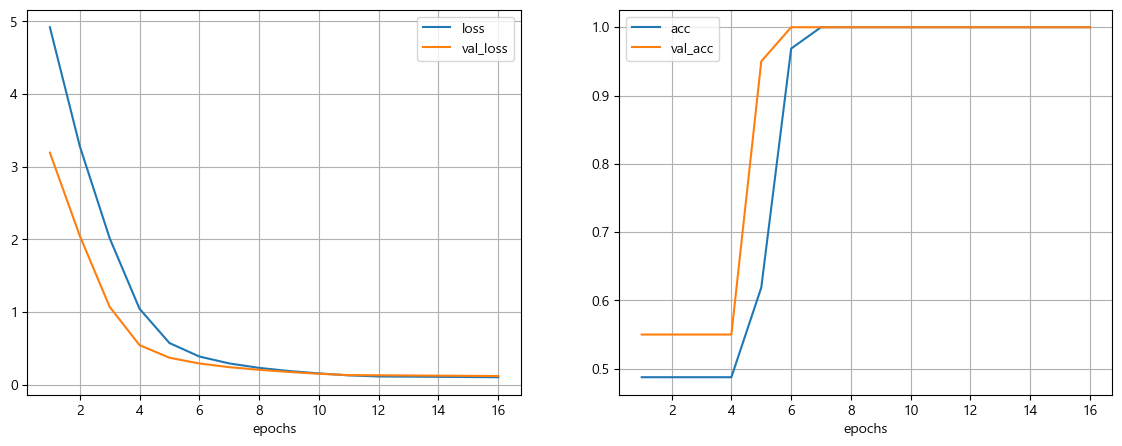

+----------+----------+---------+------------+-----------+--------+
|   epochs |     loss |     acc |   val_loss |   val_acc |     lr |
|----------+----------+---------+------------+-----------+--------|
|        1 |  4.91946 |  0.4875 |    3.19407 |      0.55 |  0.001 |
|        2 |  3.28362 |  0.4875 |    2.05015 |      0.55 |  0.001 |
|        3 |  2.01693 |  0.4875 |     1.0723 |      0.55 |  0.001 |
|        4 |  1.04554 |  0.4875 |   0.545813 |      0.55 |  0.001 |
|        5 |  0.57506 | 0.61875 |   0.372499 |      0.95 |  0.001 |
|        6 | 0.389334 | 0.96875 |   0.293553 |         1 |  0.001 |
|        7 | 0.294267 |       1 |   0.242863 |         1 |  0.001 |
|        8 | 0.233186 |       1 |   0.206468 |         1 |  0.001 |
|        9 | 0.189698 |       1 |   0.176817 |         1 |  0.001 |
|       10 | 0.157137 |       1 |   0.151759 |         1 |  0.001 |
|       11 | 0.129805 |       1 |   0.133748 |         1 |  0.001 |
|       12 | 0.115048 |       1 |   0.131285 |  

In [23]:
tf_result(result, history_table=True)

## #04. 성능평가

### [1] 검증 데이터에 대한 예측 결과 산정

sklearn의 경우 `predict()`의 결과가 1차 배열로 리턴되지만 tensor는 2차 배열로 리턴된다.

sklearn의 성능평가 함수를 활용하기 위해서는 `predict()`의 결과를 1차 배열로 변환해야 한다.

In [24]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

2/2 [==============================] - 0s 0s/step
40개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.1843815 ]
 [0.9653629 ]
 [0.9690449 ]
 [0.12901303]
 [0.8668731 ]
 [0.97683054]
 [0.14367613]
 [0.75025904]
 [0.06082163]
 [0.95469844]
 [0.11729769]
 [0.9831045 ]
 [0.9847195 ]
 [0.98705506]
 [0.15842572]
 [0.10673169]
 [0.06400296]
 [0.92966825]
 [0.1478819 ]
 [0.17600626]
 [0.93966997]
 [0.9539117 ]
 [0.19068982]
 [0.94462264]
 [0.0933811 ]
 [0.6565414 ]
 [0.8936001 ]
 [0.89497066]
 [0.977821  ]
 [0.08478975]
 [0.1978728 ]
 [0.09070484]
 [0.9274174 ]
 [0.9669073 ]
 [0.0887148 ]
 [0.9617352 ]
 [0.9629965 ]
 [0.18396021]
 [0.4539959 ]
 [0.885954  ]]


### [2] 예측결과를 1차 배열로 변환

> 이 내용을 모듈에 적용함

In [25]:
pred = test_pred.flatten()
pred

array([0.1843815 , 0.9653629 , 0.9690449 , 0.12901303, 0.8668731 ,
       0.97683054, 0.14367613, 0.75025904, 0.06082163, 0.95469844,
       0.11729769, 0.9831045 , 0.9847195 , 0.98705506, 0.15842572,
       0.10673169, 0.06400296, 0.92966825, 0.1478819 , 0.17600626,
       0.93966997, 0.9539117 , 0.19068982, 0.94462264, 0.0933811 ,
       0.6565414 , 0.8936001 , 0.89497066, 0.977821  , 0.08478975,
       0.1978728 , 0.09070484, 0.9274174 , 0.9669073 , 0.0887148 ,
       0.9617352 , 0.9629965 , 0.18396021, 0.4539959 , 0.885954  ],
      dtype=float32)

### [3] 분류 결과 확인

In [11]:
# my_classification_result(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

5/5 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets